In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
state_mapping = {'s1': 0, 's2': 1, 's3': 2, 's4': 3, 's5': 4, 's6': 5, 's7': 6}
action_mapping = {'a1': 0, 'a2': 1}
num_states = len(state_mapping)
num_actions = len(action_mapping)

In [28]:
P = np.zeros((num_states, num_states, num_actions))
R = np.zeros((num_states, num_actions))

In [29]:
# Transition probabilities
P[state_mapping['s1'], state_mapping['s4'], action_mapping['a1']] = 0.7
P[state_mapping['s1'], state_mapping['s2'], action_mapping['a1']] = 0.3
P[state_mapping['s1'], state_mapping['s4'], action_mapping['a2']] = 1.0

P[state_mapping['s2'], state_mapping['s4'], action_mapping['a1']] = 0.4
P[state_mapping['s2'], state_mapping['s7'], action_mapping['a1']] = 0.6
P[state_mapping['s2'], state_mapping['s4'], action_mapping['a2']] = 0.9
P[state_mapping['s2'], state_mapping['s7'], action_mapping['a2']] = 0.1

P[state_mapping['s3'], state_mapping['s5'], action_mapping['a1']] = 1.0
P[state_mapping['s3'], state_mapping['s3'], action_mapping['a2']] = 0.2
P[state_mapping['s3'], state_mapping['s2'], action_mapping['a2']] = 0.8

P[state_mapping['s4'], state_mapping['s6'], action_mapping['a1']] = 1.0
P[state_mapping['s4'], state_mapping['s6'], action_mapping['a2']] = 1.0

P[state_mapping['s5'], state_mapping['s6'], action_mapping['a1']] = 0.3
P[state_mapping['s5'], state_mapping['s7'], action_mapping['a1']] = 0.7
P[state_mapping['s5'], state_mapping['s7'], action_mapping['a2']] = 1.0

In [30]:
# Rewards
R[state_mapping['s1'], action_mapping['a1']] = 4
R[state_mapping['s1'], action_mapping['a2']] = 3
R[state_mapping['s2'], action_mapping['a1']] = 6
R[state_mapping['s2'], action_mapping['a2']] = 1
R[state_mapping['s3'], action_mapping['a1']] = -1
R[state_mapping['s3'], action_mapping['a2']] = -10
R[state_mapping['s4'], action_mapping['a1']] = 14
R[state_mapping['s4'], action_mapping['a2']] = 8
R[state_mapping['s5'], action_mapping['a1']] = -2
R[state_mapping['s5'], action_mapping['a2']] = 2

In [31]:
policy_1 = np.zeros((num_states, num_actions))
policy_1[state_mapping['s1']] = [0.3, 0.7]
policy_1[state_mapping['s2']] = [0.5, 0.5]
policy_1[state_mapping['s3']] = [0.6, 0.4]
policy_1[state_mapping['s4']] = [0.25, 0.75]
policy_1[state_mapping['s5']] = [0.6, 0.4]

In [32]:
def generate_all_policies(num_states, num_actions):
    # Generate all combinations of action choices for non-terminal states
    import itertools
    return np.array(list(itertools.product(range(num_actions), repeat=num_states)))


In [33]:
# Initial state distribution
initial_state_distribution = np.array([0.1, 0.05, 0.85])

In [34]:
def runEpisode(gamma, policy):
    current_state = np.random.choice(3, p=initial_state_distribution)
    total_return = 0
    discount_factor = 1

    for t in range(2):  # Only two timesteps: t=0 and t=1
        # if terminal state then stop
        if current_state in [state_mapping['s6'], state_mapping['s7']]:
            break
        action = np.random.choice(num_actions, p=policy[current_state])
        reward = R[current_state, action]
        total_return += reward * discount_factor
        next_state = np.random.choice(num_states, p=P[current_state, :, action])
        current_state = next_state
        discount_factor *= gamma

    return total_return

In [35]:
def plotResults(results, title='Estimate of J(π) v/s Episodes'):
    N = len(results)
    plt.figure(figsize=(10, 7))
    plt.plot(np.cumsum(results) / np.arange(1, N + 1))
    plt.title(title)
    plt.xlabel('Number of Episodes')
    plt.ylabel('Estimated J(π)')
    plt.grid(True)
    plt.show()


In [36]:
def calculateStats(results):
    return np.mean(results), np.var(results)

In [37]:
def findExpectation(gamma):
    return (gamma*1.63995) - 3.405

In [38]:
def displayResults(results, N):
    average_return, variance_return = calculateStats(results)
    print(f'Estimated J(π) after {N} episodes: {average_return:.2f}')
    print(f'Variance of the returns: {variance_return:.2f}')

In [39]:
def simulateEpisodes(N, gamma, policy):
    results = [runEpisode(gamma, policy) for _ in range(N)]
    return results


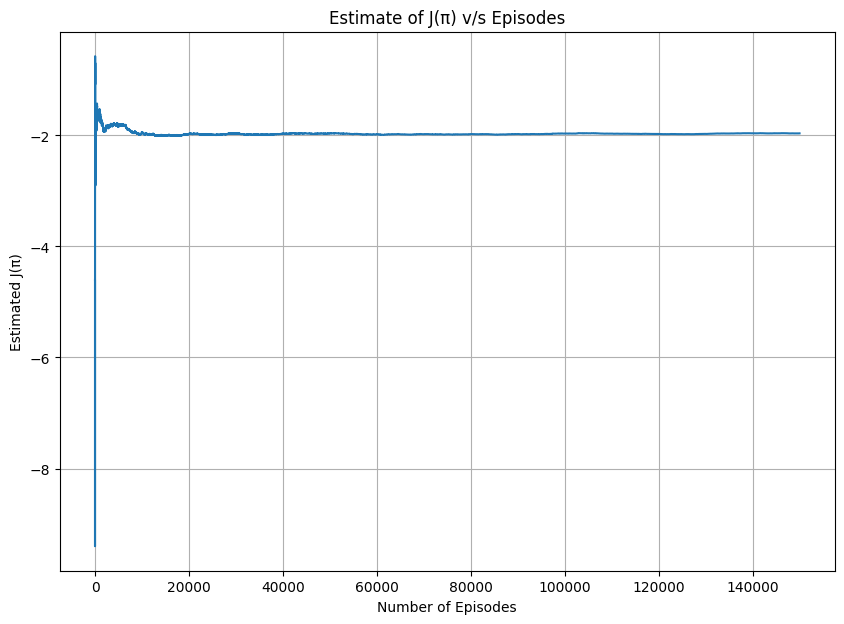

Estimated J(π) after 150000 episodes: -1.96
Variance of the returns: 46.04


In [40]:
##################### QUESTION 2(a), 2(b) #####################

N = 150000
gamma = 0.9
results = simulateEpisodes(N, gamma, policy=policy_1)
plotResults(results)
displayResults(results, N)

In [41]:
##################### QUESTION 2(c) #####################
N = 150000
gammaValues = [0.25, 0.5, 0.75, 0.99]
for gamma in gammaValues:
    results = simulateEpisodes(N, gamma, policy=policy_1)
    print("Gamma: ", gamma)
    print("Expected J(π) using formula: ", findExpectation(gamma))
    print("Computed J(π) using code: ", np.mean(results))
    

Gamma:  0.25
Expected J(π) using formula:  -2.9950124999999996
Computed J(π) using code:  -3.0124566666666666
Gamma:  0.5
Expected J(π) using formula:  -2.585025
Computed J(π) using code:  -2.58751
Gamma:  0.75
Expected J(π) using formula:  -2.1750374999999997
Computed J(π) using code:  -2.19154
Gamma:  0.99
Expected J(π) using formula:  -1.7814495
Computed J(π) using code:  -1.8093945333333332


In [42]:
##################### QUESTION 2(d) #####################
N = 350000
gamma = 0.75
policies = generate_all_policies(5, 2)  # Assuming 5 non-terminal states and 2 actions
# print(policies)

best_policy = None
max_reward = float('-inf')
rewards = []

for policy_index, policy in enumerate(policies):
    extended_policy = np.zeros((num_states, num_actions))
    for i, action in enumerate(policy):
        extended_policy[i] = [1, 0] if action == 0 else [0, 1]
    
    results = simulateEpisodes(N, gamma, policy=extended_policy)
    average_reward = np.mean(results)
    rewards.append(average_reward)
    if average_reward > max_reward:
        max_reward = average_reward
        best_policy = extended_policy


print("Best Policy (binary representation for actions in non-terminal states):")
print(best_policy)
print("Maximum Expected Reward:", max_reward)


Best Policy (binary representation for actions in non-terminal states):
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]
Maximum Expected Reward: 2.2942642857142856
